In [0]:
import csv
import numpy as np
import random
import torch
import torch.utils.data
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random
import os
import cv2

In [2]:
#Google drive load
#refer to parent folder of the .../name/name/
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

c_path = 'drive/My Drive/APS360H1 Project/flower images/color'
g_path =  'drive/My Drive/APS360H1 Project/flower images/gray'
t_path = 'drive/My Drive/APS360H1 Project/Dataset/gray'
tc_path='drive/My Drive/APS360H1 Project/Dataset/color'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

class Generator2(nn.Module):
    def __init__(self):
        super(Generator2, self).__init__()
        self.l1 = nn.Conv2d(3, 16, 3, stride = 1, padding= 1)
        self.l2 = nn.Conv2d(16, 32, 3,stride = 1, padding= 1)
        self.l3 = nn.Conv2d(32, 64, 3,stride = 1, padding= 1)
        self.l4 = nn.Conv2d(64, 128, 3,stride = 1, padding= 1)
        self.pool = nn.MaxPool2d(2,2)
        
        self.t1 = nn.ConvTranspose2d(128, 64, 3,stride = 2,padding = 1,output_padding=1)
        self.t2 = nn.ConvTranspose2d(128, 32, 3,stride = 2,padding = 1,output_padding=1)
        self.t3 = nn.ConvTranspose2d(64, 16, 3,stride = 2,padding = 1,output_padding=1)
        self.t4 = nn.ConvTranspose2d(32, 3, 3,stride = 2,padding = 1,output_padding=1)
 
        self.act = nn.Sigmoid()
 
    def forward(self, x):
        #128,128,3
        l1 = self.l1(x) 
        #128,128 16
        l1p = F.leaky_relu(self.pool(l1),0.2)
        #64,64, 16
        l2 = self.l2(l1p) 
        #64,64 32
        l2p = F.leaky_relu(self.pool(l2),0.2) 
        #32,32,32
        l3 = self.l3(l2p) 
        #32,32, 64
        l3p = F.leaky_relu(self.pool(l3),0.2) 
        #16,16, 64
        l4 = self.l4(l3p) 
        #16,16, 128
        l4p = F.leaky_relu(self.pool(l4),0.2) 
        #8,8,128
        
        t1 = self.t1(l4p)
        #16,16, 64
        t1p = torch.cat((t1,l3p),1) 
        #16,16, 64+64=128
        t2 = self.t2(t1p)
        #32,32, 32
        t2p = torch.cat((t2,l2p),1)
        #32,32, 32+32 =64
        t3 = self.t3(t2p)
        #64,64, 16
        t3p = torch.cat((t3, l1p),1)
        #64,64 16+16=32
        t4 = self.t4(t3p)
        #128,128, 3
        out = self.act(t4)
 
        return out
 


In [0]:
def load_model(model, path):
  model.load_state_dict(torch.load(path))
  return 

In [0]:
model1_path = "drive/My Drive/APS360H1 Project/Train_weights/Gen2-65e"
model1 = Generator2()
load_model(model1, model1_path)

In [0]:
model2_path = "drive/My Drive/APS360H1 Project/Train_weights/Gen2-final-GAN"
model2 = Generator2()
load_model(model2, model2_path)

In [0]:
def testshow(model, iml, train = False):
  """
  input url string
  """
  
  path ='drive/My Drive/APS360H1 Project/test/'
 
  #Creating Dataset
  transform = transforms.Compose(
        [transforms.ToTensor()])
  ottoset = torchvision.datasets.ImageFolder(root = path, transform=transform)
 
  img_o = ottoset[0][0]
  img_g = img_o.unsqueeze(0)
 
  if train:
    img_g=img.cuda()
    model.cuda()
  else:
    pass
  
  output = model(img_g)
  output=output.cpu()
  output = output.squeeze()
  output = output.detach().numpy()
  #output = output.unsqueeze()
 
  output = np.transpose(output, [1,2,0])
  img_o = np.transpose(img_o, [1,2,0])
  #iml = np.transpose(iml,[1,2,0])
 
  plt.subplot(1, 3, 2)
  plt.axis('off')
  plt.imshow(output)
 
  plt.subplot(1, 3, 1)
  plt.axis('off')
  plt.imshow(img_o)
 
  plt.subplot(1, 3, 3)
  plt.axis('off')
  plt.imshow(iml)



def demonstrate(url,model):
 
  from PIL import Image
  import requests
  from io import BytesIO
  response = requests.get(url)
  img = Image.open(BytesIO(response.content))
  newsize = (128, 128) 
  im1 = img.resize(newsize) 
  #img2 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
  img2 = im1.convert('LA')
  #img2.show
  #isplay(img2)
  #print(type(img2))
  #cv2.imwrite('C:/Users/N/Desktop/Test_gray.jpg', image_gray) 
 
  img2.save("drive/My Drive/APS360H1 Project/test/test/greyscale.png")
  #cv2.imwrite('drive/My Drive/APS360H1 Project/test/test/greyscale.jpg', img2)
 
  testshow(model,im1)






In [0]:
def Visualize(model, feedset, originalset, num_of_img=1, loaded = False, start=0):
  #not randomized

  if num_of_img > len(feedset):
    return print("Not enough imgs in dataset\nDataset has {}".format(len(feedset)))
     
  if len(feedset) != len(originalset):
    return print("Two datasets have different number of data")
    
  

  load = torch.utils.data.DataLoader(feedset, batch_size=1, num_workers=0)
  c_load = torch.utils.data.DataLoader(originalset, batch_size=1, num_workers=0)

  k=0
  j=0
  for data1, data2 in zip(load, c_load):
    if j<start:
      j+=1
    else:
      img_f, label_f = data1
      img_c, label_c = data2

      if loaded:
        output = model(img_f)
      else:
        img_f = img_f.cuda() 
        output = model(img_f)
        output=output.cpu()

      output = output.detach().numpy()
      output = np.transpose(output[0], [1,2,0])
      img_c = np.transpose(img_c[0], [1,2,0])

      plt.subplot(num_of_img, 2, 2*k+1)
      plt.axis('off')
      plt.imshow(output)

      plt.subplot(num_of_img, 2, 2*k+2)
      plt.axis('off')
      plt.imshow(img_c)

      k+=1
      if k == num_of_img:
        break 

In [0]:
#Creating test set
transform3 = transforms.Compose(
        [transforms.CenterCrop(128),      
            transforms.ToTensor(),
               ])
test_set = torchvision.datasets.ImageFolder(root=t_path, transform=transform3)
test_c_set = torchvision.datasets.ImageFolder(root=tc_path, transform=transform3)
test_g_set = torchvision.datasets.ImageFolder(root=t_path, transform=transform3)


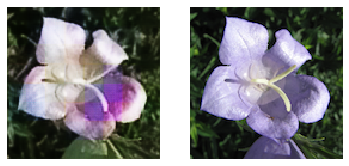

In [11]:
Visualize(model2, test_g_set, test_c_set, num_of_img=1, loaded = True,start=74)

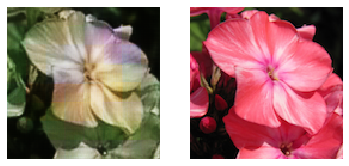

In [12]:
Visualize(model1, test_g_set, test_c_set, num_of_img=1, loaded = True,start=4)

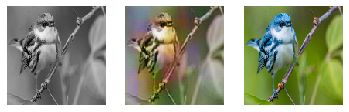

In [0]:
path = 'https://academy.allaboutbirds.org/wp-content/uploads/2018/10/eBirdthumbnail_AndrewSimon_CeruleanWarbler_57482791-600x400.jpg'
demonstrate(path,model2)


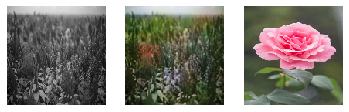

In [13]:
path = 'https://images.unsplash.com/photo-1558521958-0a228e77e984?ixlib=rb-1.2.1&w=100'
demonstrate(path,model2)